In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   int64   
 1   survived     1309 non-null   int64   
 2   name         1309 non-null   object  
 3   sex          1309 non-null   object  
 4   age          1046 non-null   float64 
 5   sibsp        1309 non-null   int64   
 6   parch        1309 non-null   int64   
 7   ticket       1309 non-null   object  
 8   fare         1308 non-null   float64 
 9   cabin        295 non-null    object  
 10  embarked     1307 non-null   object  
 11  boat         486 non-null    object  
 12  body         121 non-null    float64 
 13  home.dest    745 non-null    object  
 14  family       1309 non-null   int64   
 15  family_bins  519 non-null    category
dtypes: category(1), float64(3), int64(5), object(7)
memory usage: 155.0+ KB


## SibSp distribution

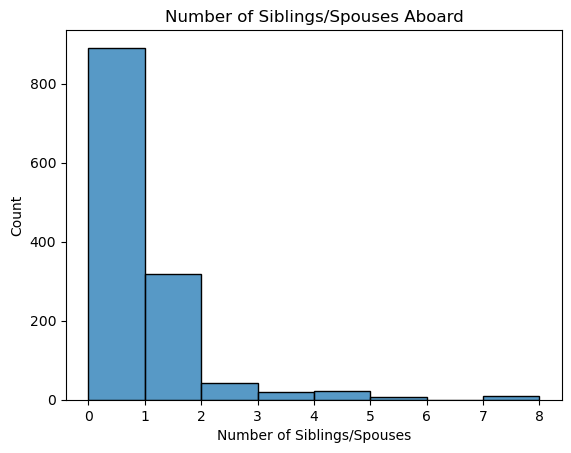

In [7]:
sns.histplot(df['sibsp'], bins=8, kde=False)
plt.title('Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

## Parch distribution

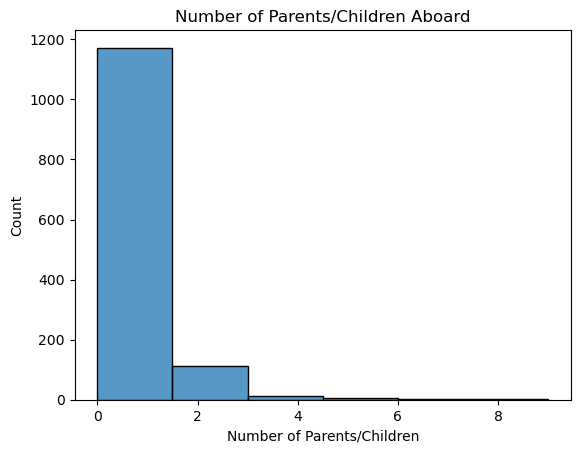

In [8]:
sns.histplot(df['parch'], bins=6, kde=False)
plt.title('Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count') 
plt.show()

In [12]:
df['family'] = df['sibsp'] + df['parch']
df['family_bins'] = pd.cut(df['family'], bins=[0, 1, 4, 7, 11], labels=['0', '1-3', '4-6', '7-10'])

## Family distribution

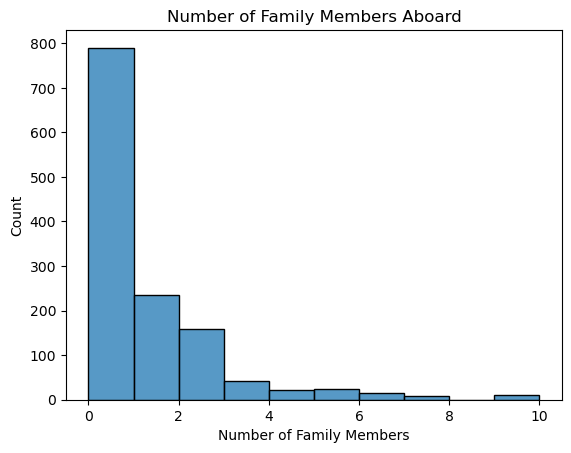

In [13]:
sns.histplot(df['family'], bins=10, kde=False)
plt.title('Number of Family Members Aboard')
plt.xlabel('Number of Family Members')
plt.ylabel('Count')
plt.show()

### Family vs Pclass

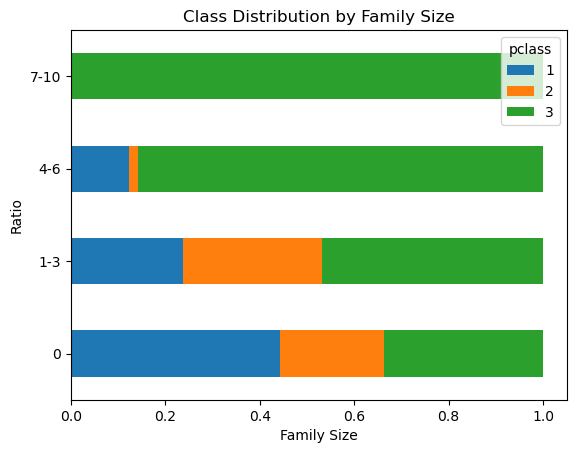

In [27]:
grouped_by_family = df.groupby('family_bins', observed=True)
pclass_count = grouped_by_family['pclass'].value_counts(normalize=True).unstack()
pclass_count.plot(kind='barh', stacked='True')
plt.title('Class Distribution by Family Size')
plt.legend(title='pclass')
plt.xlabel('Family Size')
plt.ylabel('Ratio')
plt.show()

### Family vs Survived

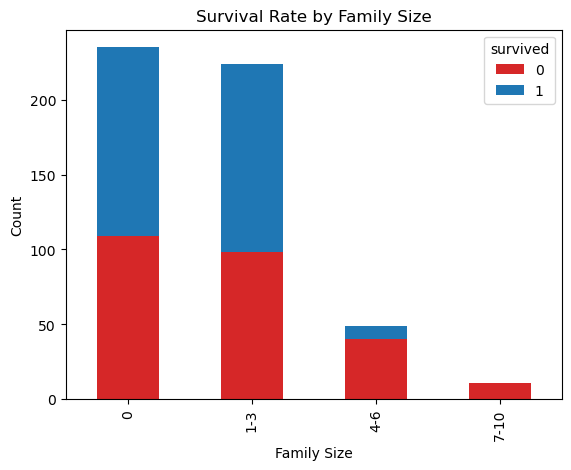

In [26]:
survived_count = grouped_by_family['survived'].value_counts().unstack()
survived_count.plot(kind='bar', stacked='True', color=['tab:red', 'tab:blue'])
plt.title('Survival Rate by Family Size')
plt.legend(title='survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [30]:
df['ticket'].describe() 

count         1309
unique         939
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [34]:
df['cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object

In [40]:
df['cabin_row'] = df['cabin'].str[0]
cabin_df = df.dropna(subset=['cabin_row'])
cabin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 1249
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       295 non-null    int64   
 1   survived     295 non-null    int64   
 2   name         295 non-null    object  
 3   sex          295 non-null    object  
 4   age          272 non-null    float64 
 5   sibsp        295 non-null    int64   
 6   parch        295 non-null    int64   
 7   ticket       295 non-null    object  
 8   fare         295 non-null    float64 
 9   cabin        295 non-null    object  
 10  embarked     293 non-null    object  
 11  boat         193 non-null    object  
 12  body         32 non-null     float64 
 13  home.dest    258 non-null    object  
 14  family       295 non-null    int64   
 15  family_bins  164 non-null    category
 16  cabin_row    295 non-null    object  
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 39.7+ KB


## Cabin Row vs Pclass

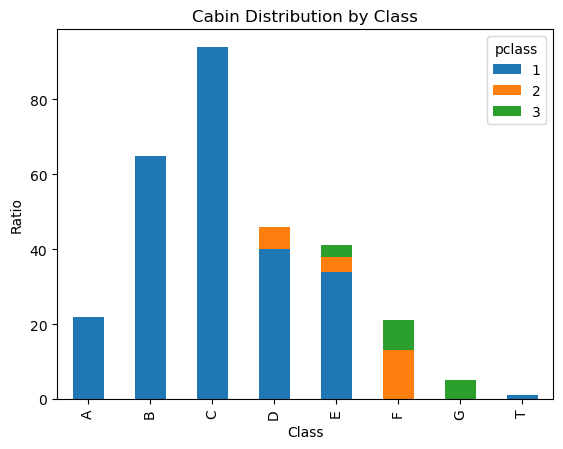

In [70]:
grouped_by_cabin_row = cabin_df.groupby('cabin_row', observed=True)
pclass_count = grouped_by_cabin_row['pclass'].value_counts().unstack()
pclass_count.plot(kind='bar', stacked='True')
plt.title('Cabin Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Ratio')
plt.show()

## Survivel vs Cabin

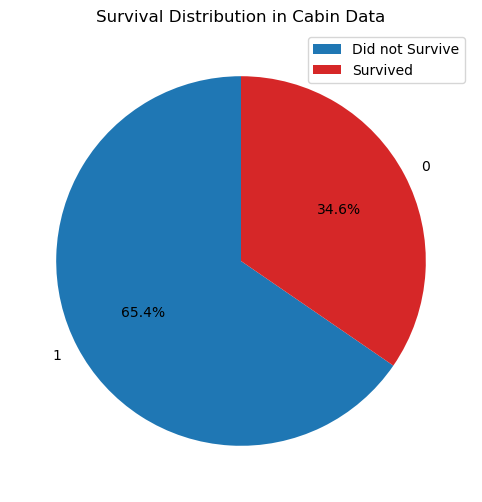

In [75]:
survival_counts = cabin_df['survived'].value_counts()
plt.figure(figsize=(8, 6))
survival_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['tab:blue', 'tab:red'])
plt.title('Survival Distribution in Cabin Data')
plt.ylabel('')
plt.legend(['Did not Survive', 'Survived'])
plt.show()

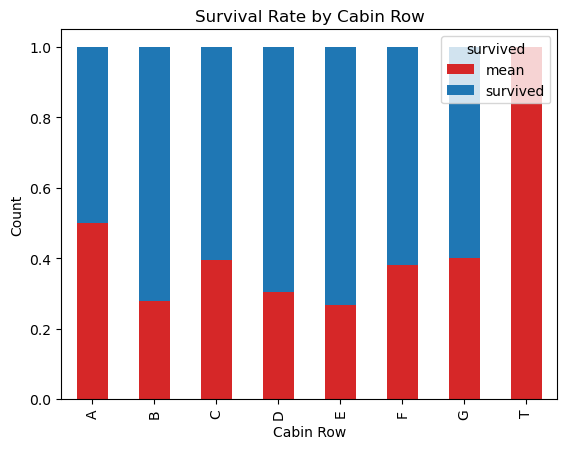

survived,0,1
cabin_row,,
A,0.500000,0.500000
B,0.276923,0.723077
C,0.393617,0.606383
D,0.304348,0.695652
E,0.268293,0.731707


In [74]:
survived_count = grouped_by_cabin_row['survived'].value_counts(
    normalize=True).unstack()
survived_count.plot(kind='bar', stacked='True', color=['tab:red', 'tab:blue'])
plt.title('Survival Rate by Cabin Row')
plt.legend(['mean', 'survived', 'Did not Survive'], title='survived')
plt.xlabel('Cabin Row')
plt.ylabel('Count')
plt.show()